# Association Between Final Grade in Math and Family/Social Life Aspects of Students in Secondary Education in Portugal - Research Paper

## Introduction

The dataset "Student Performance" created by Paulo Cortez and Alice Silva was collected during the 2005-2006 school year from the public schools Gabriel Pereira and Mousinho da Silveira in Portugal, consisting of 395 observations. In total, there are 32 explanatory variables and the response variable: the final grade of a participant in Mathematics. It has both continuous and categorical attributes and addresses classification tasks.

Our group will focus on students' performance, particularly in mathematics, in secondary education where information such as personal, family, and school aspects were collected using school reports and questionnaires. 

 **Research Question**: Which aspects of family and social life are significantly associated with the final grade in Mathematics? 

To answer this question, we will examine eight possible covariates that may affect a student's final grade in mathematics. This data can be accessed from ttps://archive.ics.uci.edu/dataset/320/student+performance 

Reference:
Cortez, P., & Silva, A. M. G. (2008). Using data mining to predict secondary school student performance. In A. Brito, & J. Teixeira (Eds.), Proceedings of 5th Annual Future Business Technology Conference, Porto, 5-12. 

|Variable|Unit|Values|
|--------|----|---------------|
|sex: student's sex|NA|'F' = female; 'M' = male|
|age: student's age|years|integers from 15 to 22|
|Pstatus: parent's cohabitation status|NA|'T' = living together; 'A' = apart|
|Medu: mother's education|NA|0 = none; 1 = primary education (4th grade); 2 = (5th to 9th grade); 3 = secondary education; 4 = higher education|
|Fedu: father's education|NA|0 = none; 1 = primary education (4th grade); 2 = (5th to 9th grade); 3 = secondary education; 4 = higher education|
|activities: extracurricular activities|NA|0 = no; 1 = yes|
|freetime: free time after school|NA|from 1 = very low to 5 = very high|
|absences: number of school absences|NA|0 to 93|

**Table 0.1: List of Variable Names**

## Methods

Our objective is to find the covariates that best explain a student's final grade. The measures we will take to do this are as follows:
1. Read in and tidy the dataset: After loading in the dataset, it must be tidied.
2. Visualize the dataset: Create some simple scatterplots and boxplots to understand potential relationships between variables.
3. Perform stepAIC: Use AIC to find the best additive model, based on the eight possible covariates.
4. Include Interaction: Include interaction in our best additive model to determine if an interactive model may be more accurate in explaining students' final grades.
5. Residual Plots and Normality Plots: Validate Assumptions.
6. Discussion of results.

## Analysis

### Dataset and Analysis Preparation

In [33]:
# install.packages("leaps") # Run this if an installation of leaps is required
# install.packages("patchwork") # Run this if an installation of Patchwork is required

In [14]:
library(leaps)
library(tidyverse)
library(dplyr)
library(car)
library(MASS)
library(ggplot2)
library(patchwork)
options(repr.plot.width=12, repr.plot.height=5)

In [15]:
studentData <- read.table("student-mat.csv", sep=";", header=TRUE)

In [16]:
# Extract the explanatory terms and the response
studentData <- studentData[, c('sex', 'age', 'Pstatus', 'Medu', 'Fedu', 'activities', 'freetime', 'absences', 'G3')]

In [17]:
# There is no missing data to handle
sum(is.na(studentData))

[1] 0

We also want to distinguish each variable as numeric or a factor in this study. Sex, Pstatus, and activities are factors due to their binary nature. Medu and Fedu are decided to be factors since they use numbers to represent categorical education levels. Freetime is a rating system, but is numeric due to its ordinal nature. Age, absences, and G3 are numeric in nature. 

In [18]:
studentData <- studentData %>%
    mutate(sex = as.factor(sex), 
           age = as.numeric(age),
           Pstatus = as.factor(Pstatus), 
           Medu = as.factor(Medu),
           Fedu = as.factor(Fedu),
           activities = as.factor(activities),
           freetime = as.numeric(freetime), 
           absences = as.numeric(absences), 
           G3 = as.numeric(G3))

### Preliminary Visualizations and Summaries

Some basic summaries and statistics can be generated with simple R commands.

In [19]:
summary(studentData)

 sex          age       Pstatus Medu    Fedu    activities    freetime    
 F:208   Min.   :15.0   A: 41   0:  3   0:  2   no :194    Min.   :1.000  
 M:187   1st Qu.:16.0   T:354   1: 59   1: 82   yes:201    1st Qu.:3.000  
         Median :17.0           2:103   2:115              Median :3.000  
         Mean   :16.7           3: 99   3:100              Mean   :3.235  
         3rd Qu.:18.0           4:131   4: 96              3rd Qu.:4.000  
         Max.   :22.0                                      Max.   :5.000  
    absences            G3       
 Min.   : 0.000   Min.   : 0.00  
 1st Qu.: 0.000   1st Qu.: 8.00  
 Median : 4.000   Median :11.00  
 Mean   : 5.709   Mean   :10.42  
 3rd Qu.: 8.000   3rd Qu.:14.00  
 Max.   :75.000   Max.   :20.00  

In [20]:
str(studentData)

'data.frame':	395 obs. of  9 variables:
 $ sex       : Factor w/ 2 levels "F","M": 1 1 1 1 1 2 2 1 2 2 ...
 $ age       : num  18 17 15 15 16 16 16 17 15 15 ...
 $ Pstatus   : Factor w/ 2 levels "A","T": 1 2 2 2 2 2 2 1 1 2 ...
 $ Medu      : Factor w/ 5 levels "0","1","2","3",..: 5 2 2 5 4 5 3 5 4 4 ...
 $ Fedu      : Factor w/ 5 levels "0","1","2","3",..: 5 2 2 3 4 4 3 5 3 5 ...
 $ activities: Factor w/ 2 levels "no","yes": 1 1 1 2 1 2 1 1 1 2 ...
 $ freetime  : num  3 3 3 2 3 4 4 1 2 5 ...
 $ absences  : num  6 4 10 2 4 10 0 6 0 0 ...
 $ G3        : num  6 6 10 15 10 15 11 6 19 15 ...


However, these numbers may seem a little cryptic, so we follow with some visualizations that can better describe the data that we are working with.

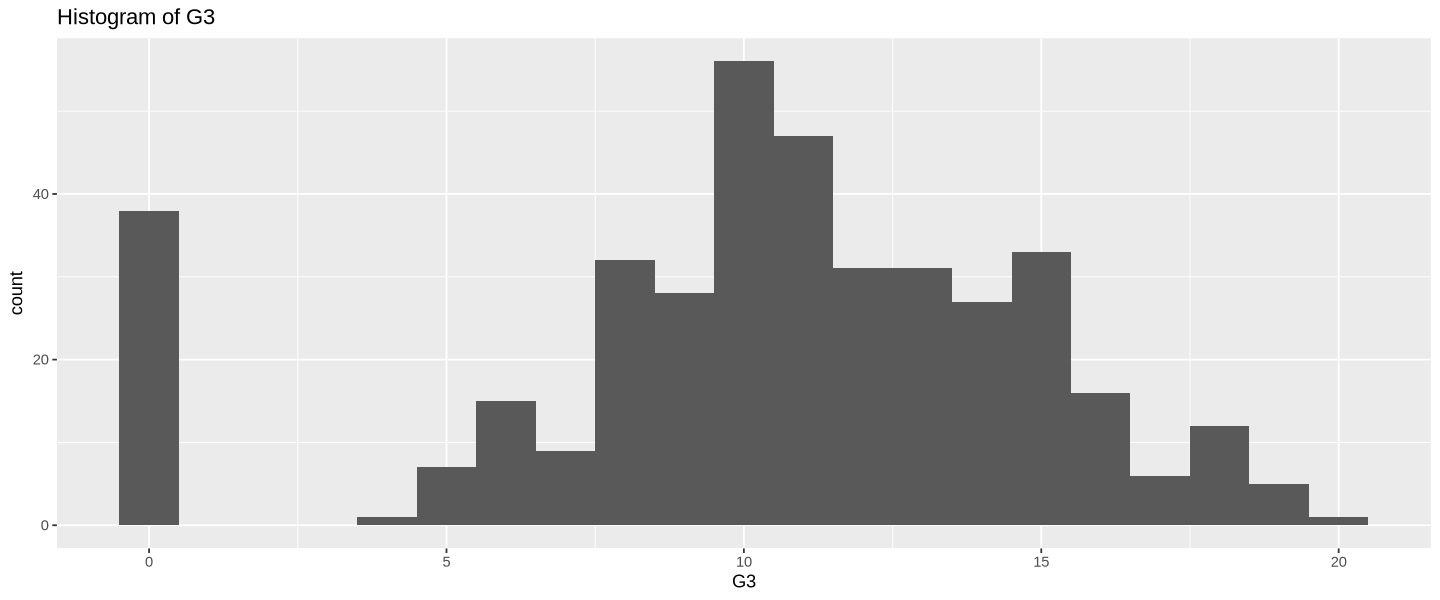

In [32]:
# Distribution of G3
ggplot(studentData, aes(x = G3)) +
  geom_histogram(binwidth=1) +
  ggtitle("Histogram of G3")

This histogram shows a fairly normal distribution about the mean (10.42), despite a number of outliers sitting at the left end of the distribution (with a G3 score of zero).

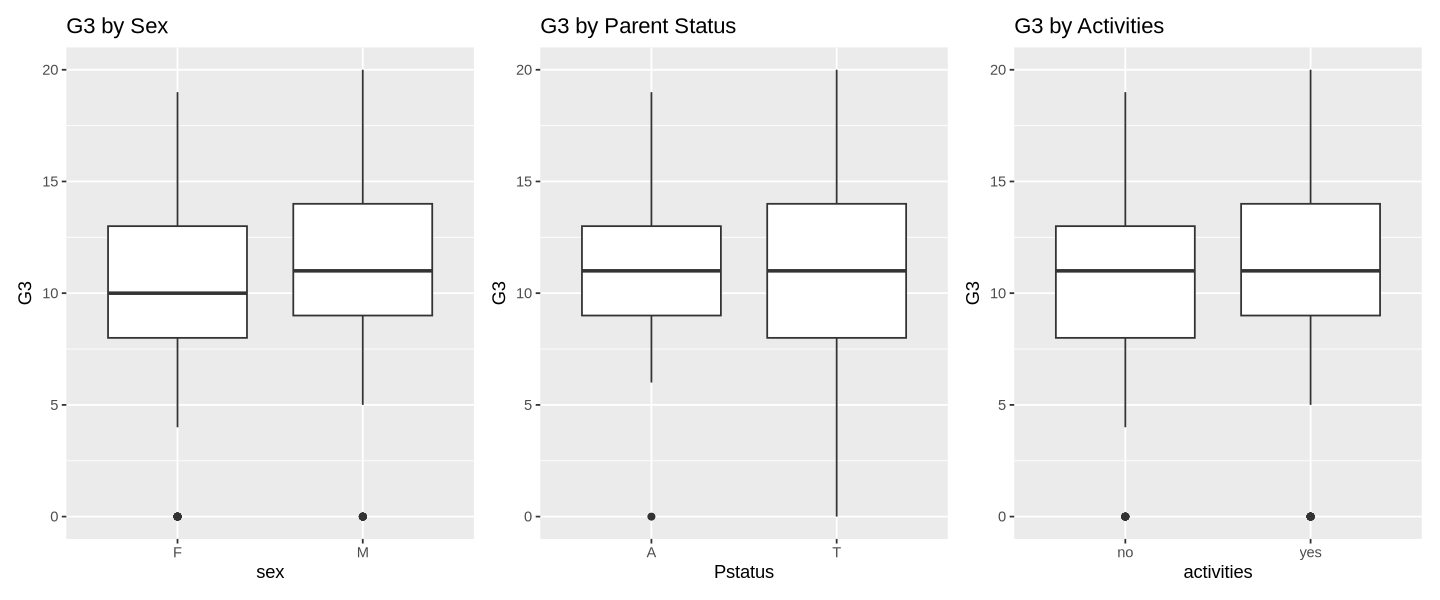

In [21]:
# Boxplots for binary explanatory variables
p1 <- ggplot(studentData, aes(x = sex, y = G3)) +
  geom_boxplot() +
  labs(title = "G3 by Sex")
p2 <- ggplot(studentData, aes(x = Pstatus, y = G3)) +
  geom_boxplot() +
  labs(title = "G3 by Parent Status")
p3 <- ggplot(studentData, aes(x = activities, y = G3)) +
  geom_boxplot() +
  labs(title = "G3 by Activities")
(p1 | p2 | p3)

We can see that the median G3 score is identical among the two different Pstatuses; however, there is a much larger spread among the scores of those with the "T" Pstatus (which means that the parents are living together). For activities, we also see that the median score is the same for those that with or without extracurricular activities, although it seems that the two boxplots have different tails in their distributions. Finally, for the sex variable, it seems that the distribution is fairly similar, with male students having slightly higher G3 scores overall. There can be confounding variables that affect conclusions made solely based on these visualizations, however.

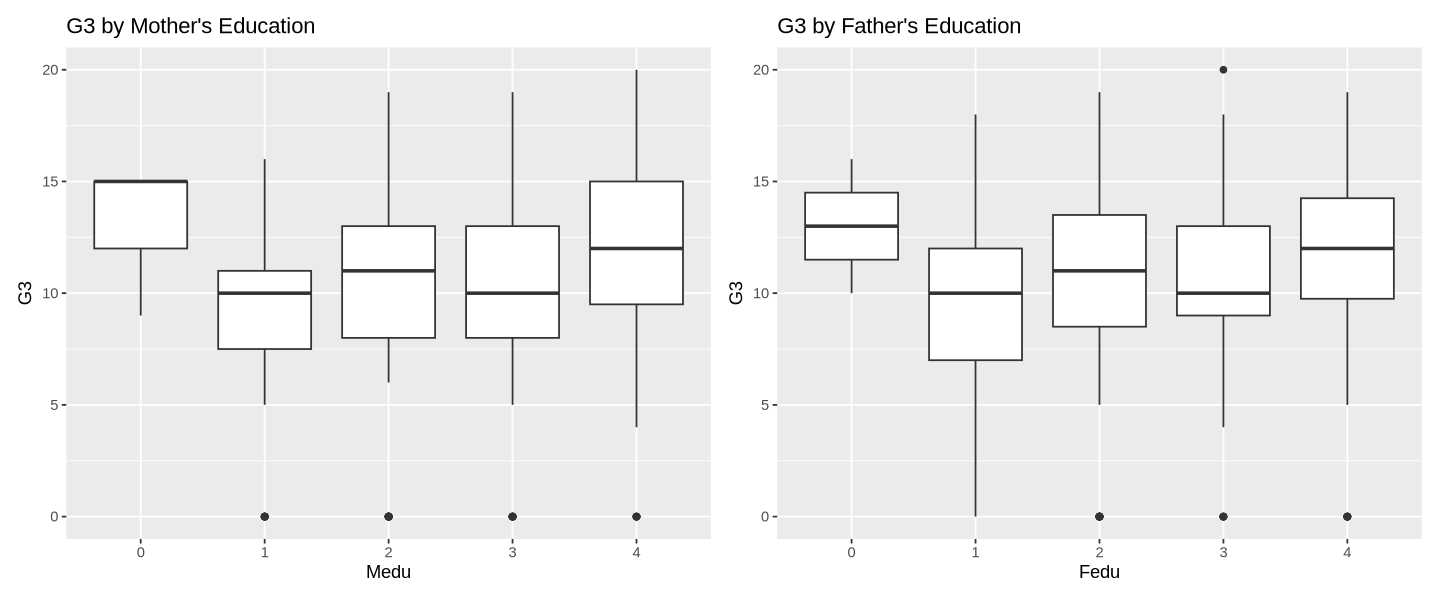

In [22]:
# Multi-level boxplots for Medu and Fedu factor variables
p4 <- ggplot(studentData, aes(x = Medu, y = G3)) +
  geom_boxplot() +
  labs(title = "G3 by Mother's Education")
p5 <- ggplot(studentData, aes(x = Fedu, y = G3)) +
  geom_boxplot() +
  labs(title = "G3 by Father's Education")
(p4 | p5)

The boxplots comparing G3 scores with the educational levels of both mothers (Medu) and fathers (Fedu) show a general upward trend in G3 as Medu/Fedu scores increase, with the exception of having a Medu or Fedu score of 0 (these individuals seems to have a fairly high G3 score, with lower spread as well). However, the boxplot doesn't show how many responses are in each Medu/Fedu level, which can be slightly misleading.

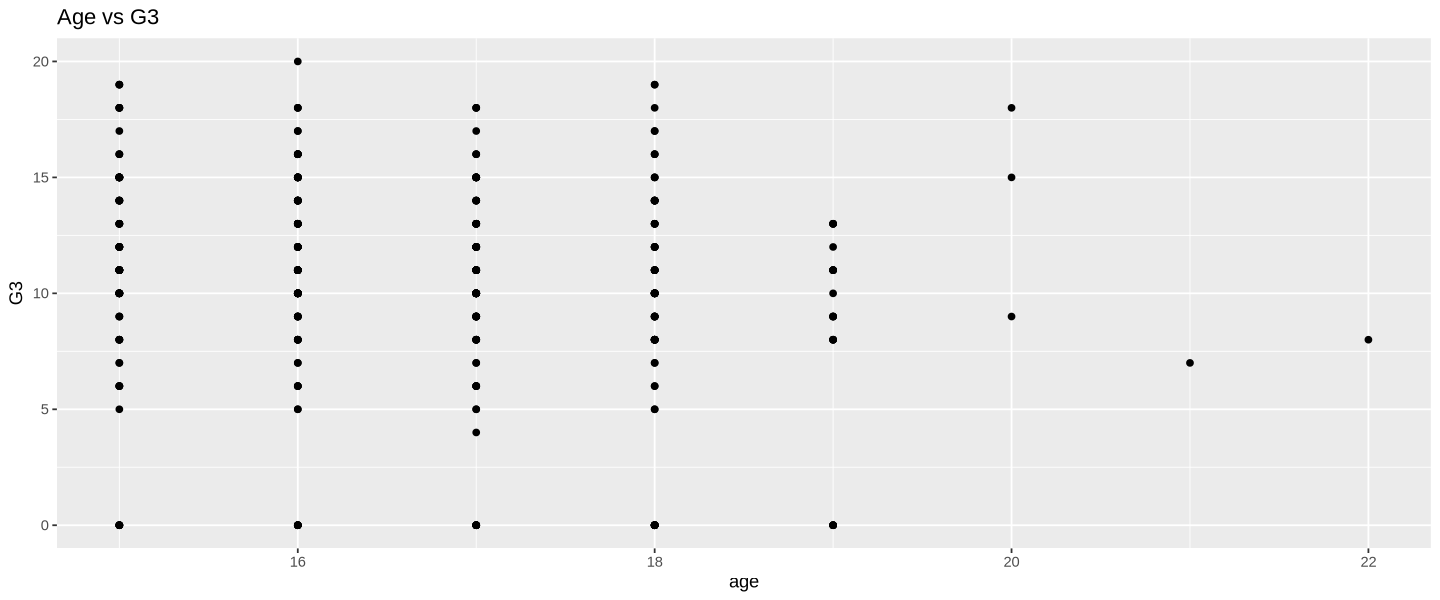

In [23]:
# Scatterplots for numeric data
# Age vs G3
p6 <- ggplot(studentData, aes(x = age, y = G3)) +
  geom_point() +
  ggtitle("Age vs G3")

# Freetime vs G3b
p7 <- ggplot(studentData, aes(x = freetime, y = G3)) +
  geom_point() +
  ggtitle("Freetime vs G3")

# absences vs G3
p8 <- ggplot(studentData, aes(x = absences, y = G3)) +
  geom_point() +
  ggtitle("Absences vs G3")
p6

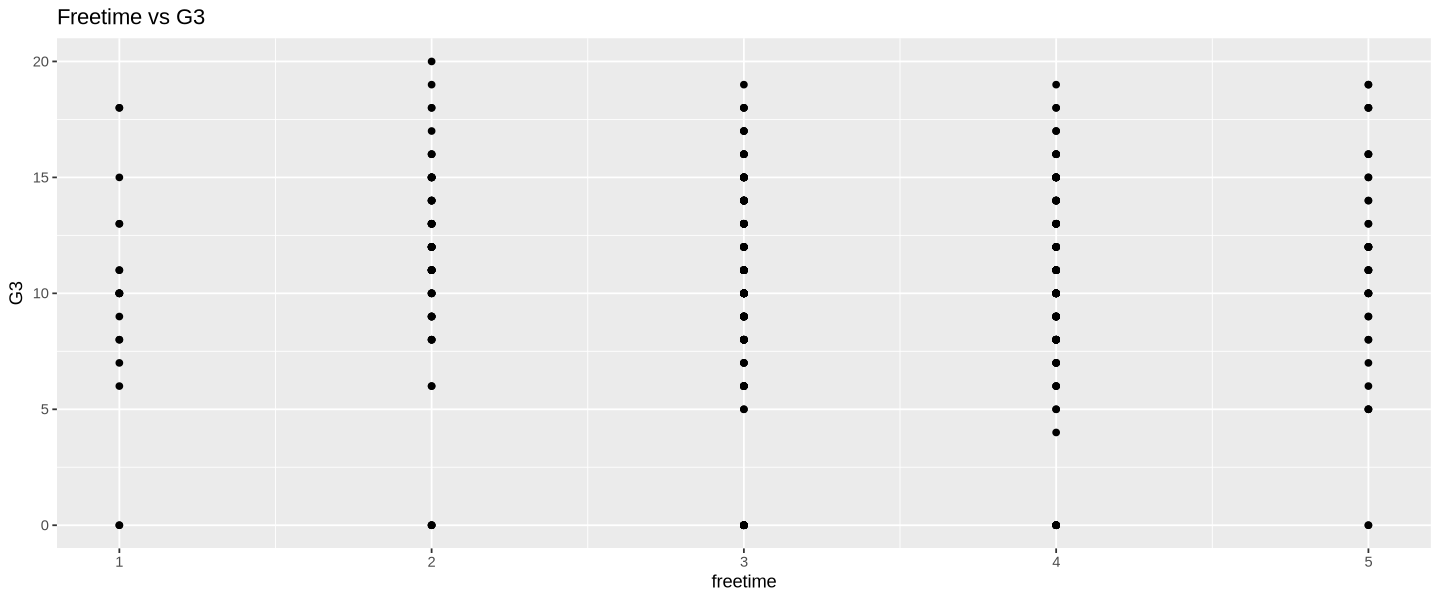

In [24]:
p7

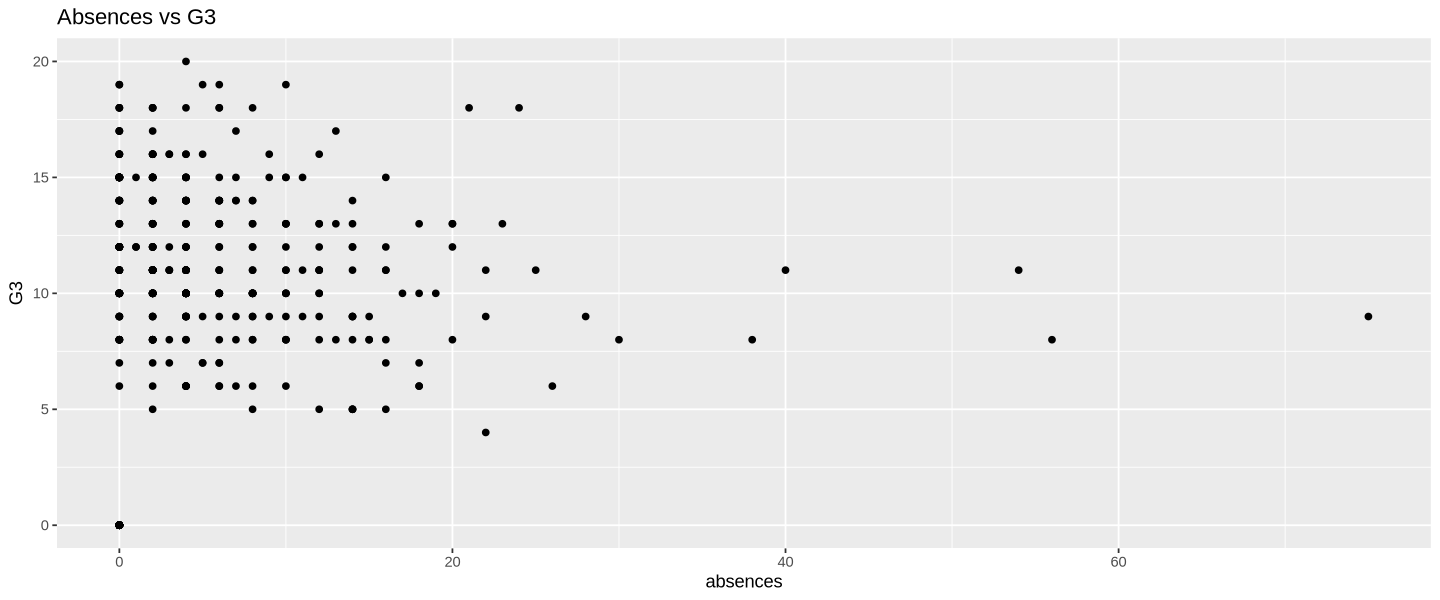

In [25]:
p8

These scatterplots do not show a clear linear relationship between a singular numeric explanatory variables and G3. We will further explore how a combination of these variables, as well as categorical covariates, may help us draw more thorough conclusions.

## Conclusion